In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
sns.set_style('whitegrid')

import scipy
import warnings

warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')

In [30]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [32]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [33]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


<Axes: >

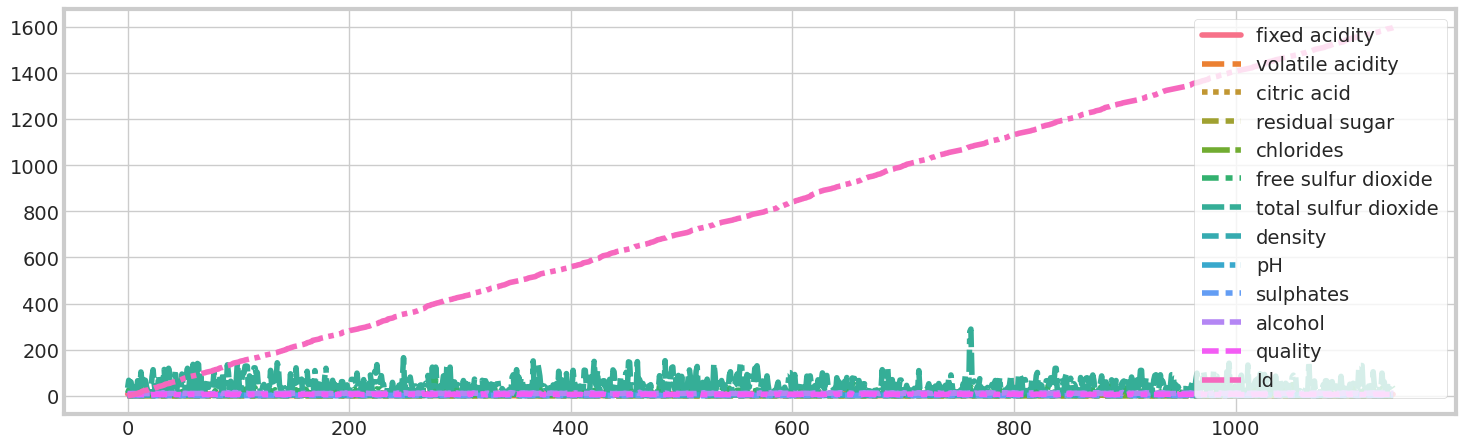

In [34]:
plt.figure(figsize=(16,5))
sns.lineplot(data=df)

<Axes: >

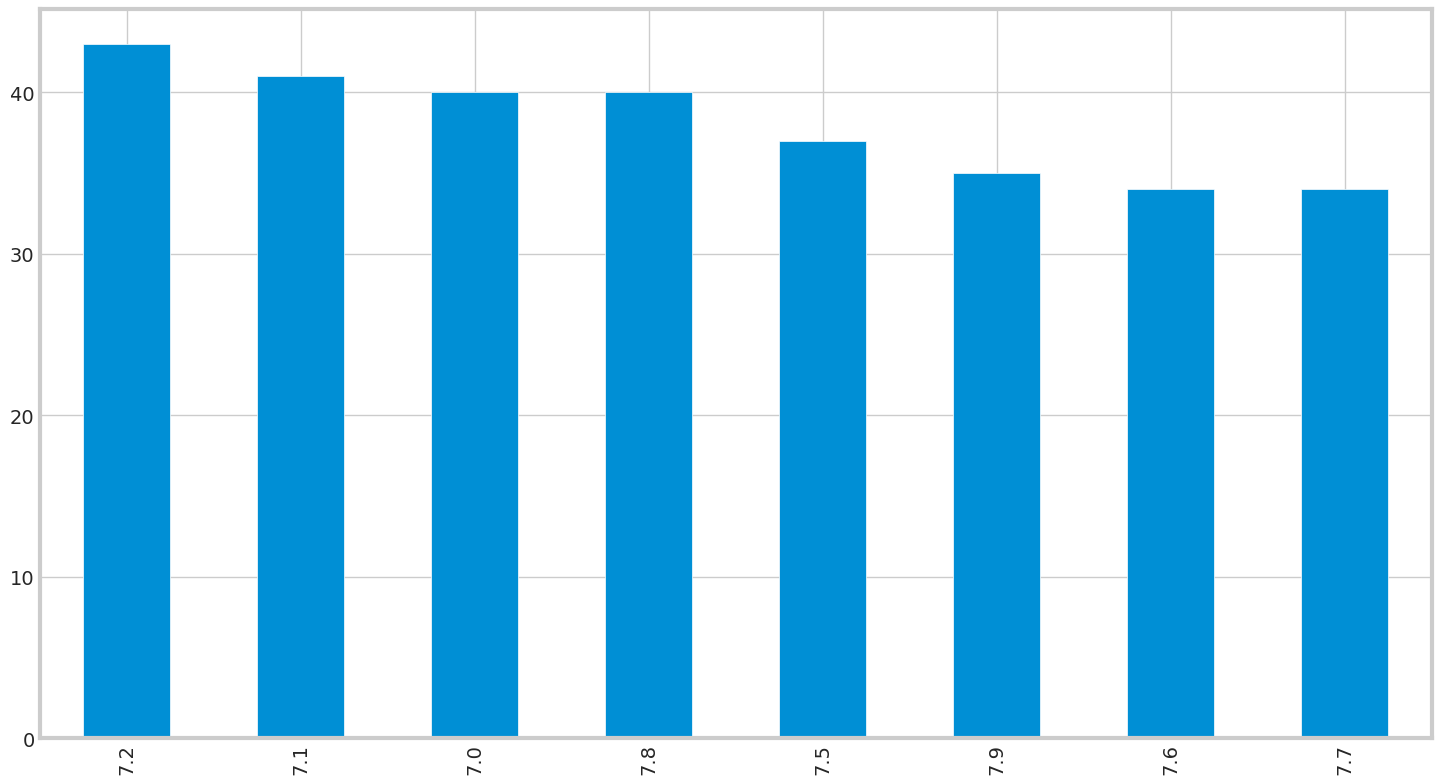

In [35]:
plt.figure(figsize=(16,9))
df['fixed acidity'].value_counts().head(8).plot.bar()

<Axes: >

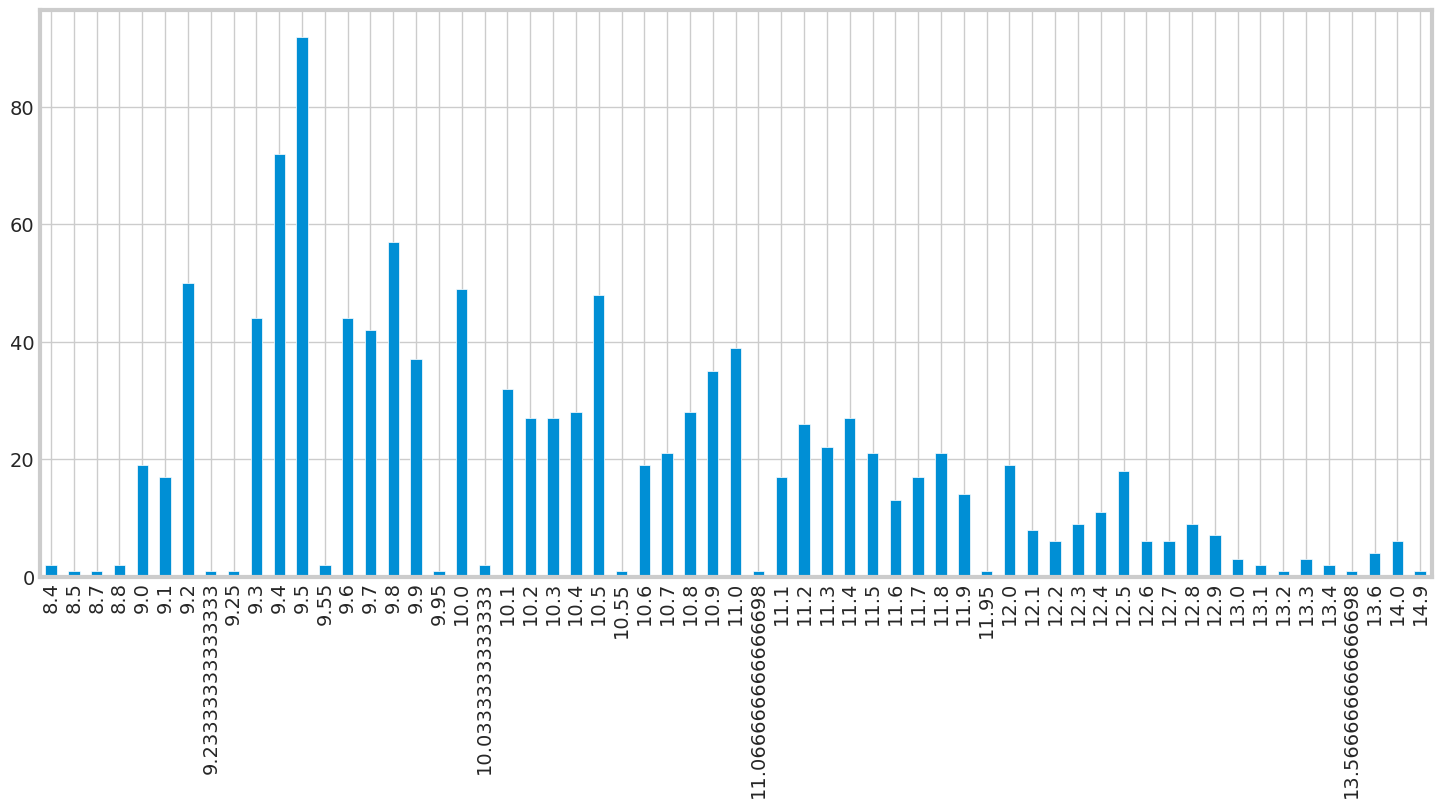

In [36]:
plt.figure(figsize=(16,7))
df['alcohol'].value_counts().sort_index().plot.bar()

<Axes: title={'center': 'Quality of wine'}>

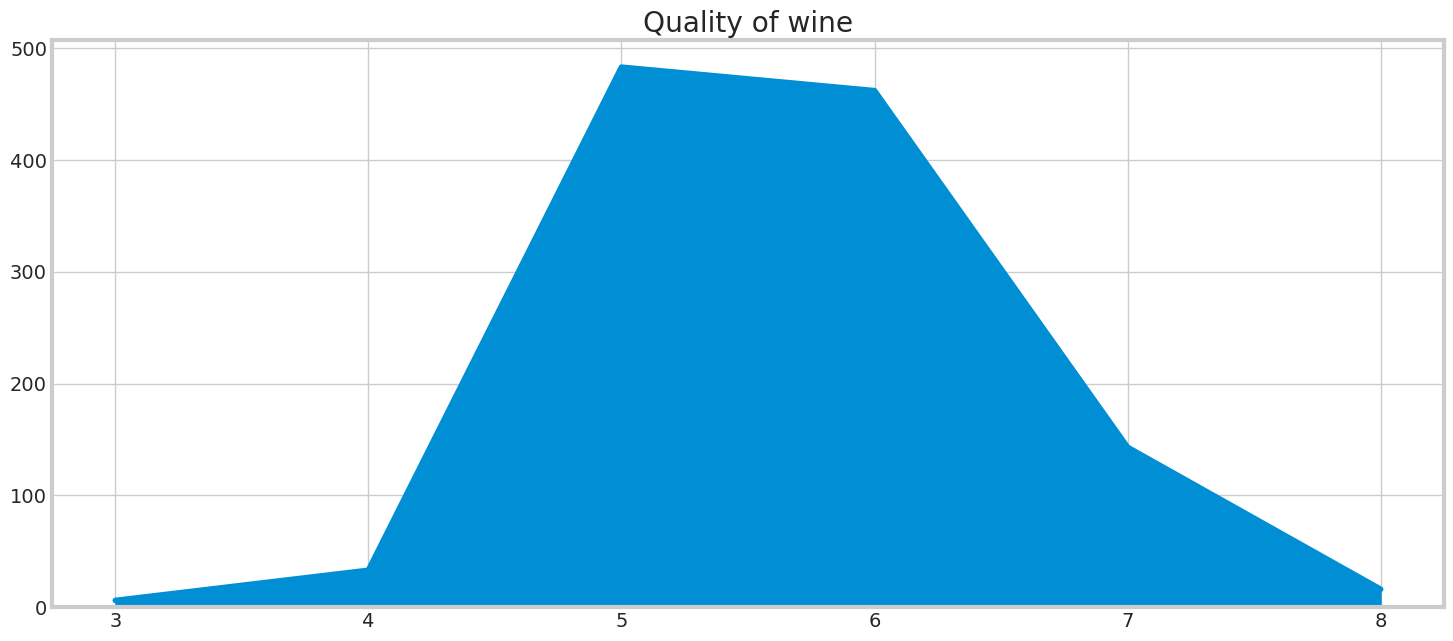

In [37]:
df['quality'].value_counts().sort_index().plot.area(
    figsize = (16,7),
    title = 'Quality of wine'
)

In [38]:
df.corr().style.background_gradient(cmap = 'Blues')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


In [39]:
df.duplicated().sum()

0

In [40]:
def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} histogram plot')
    
    #mean = feature.describe().mean()
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    #plt.legend({'--': mu, 'sigma': sigma})
    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()

In [41]:
num_feat = df.select_dtypes(exclude = 'object')

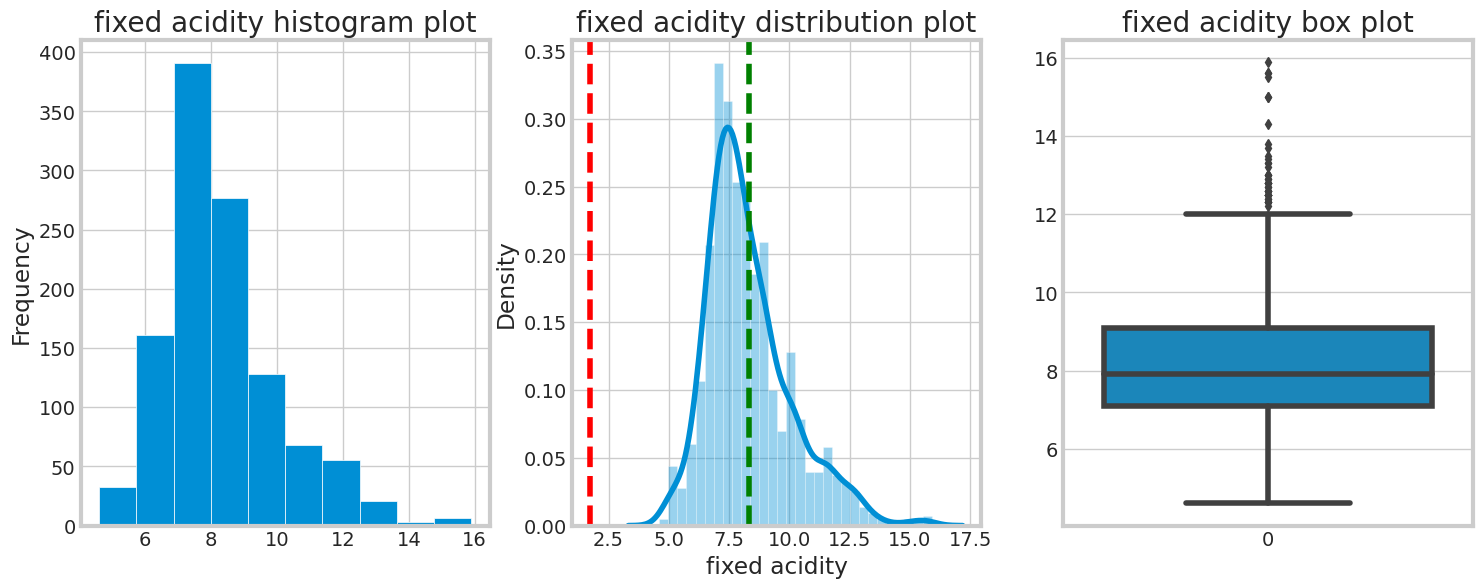

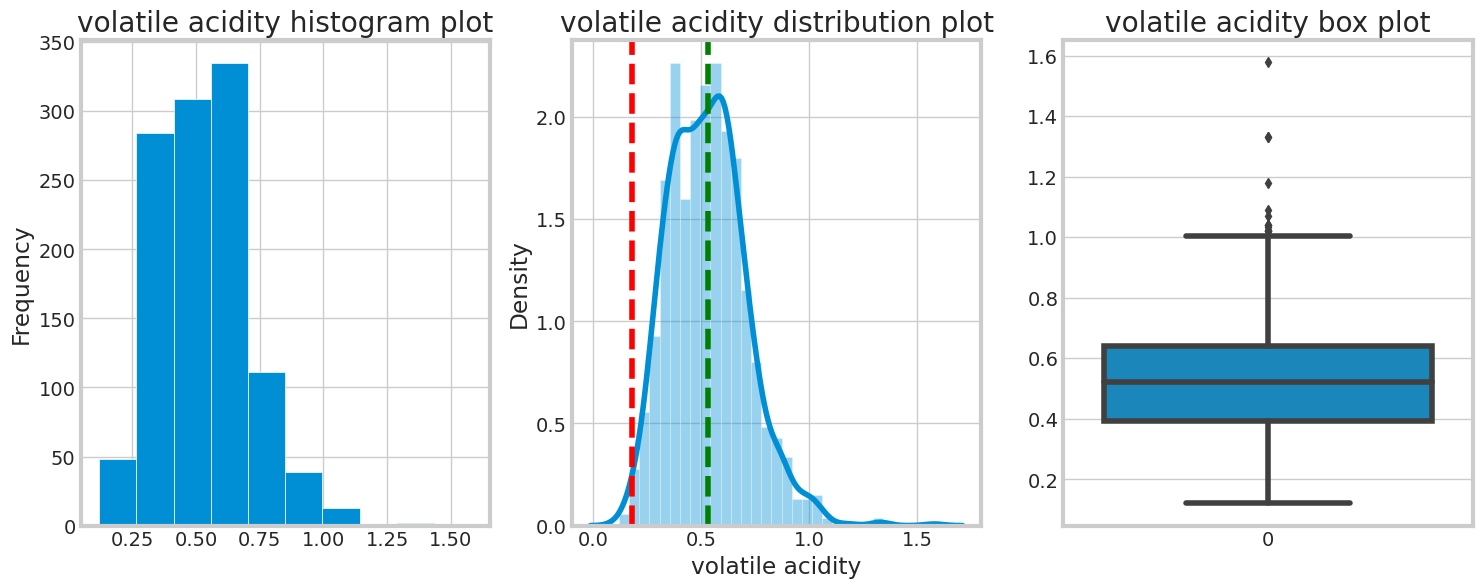

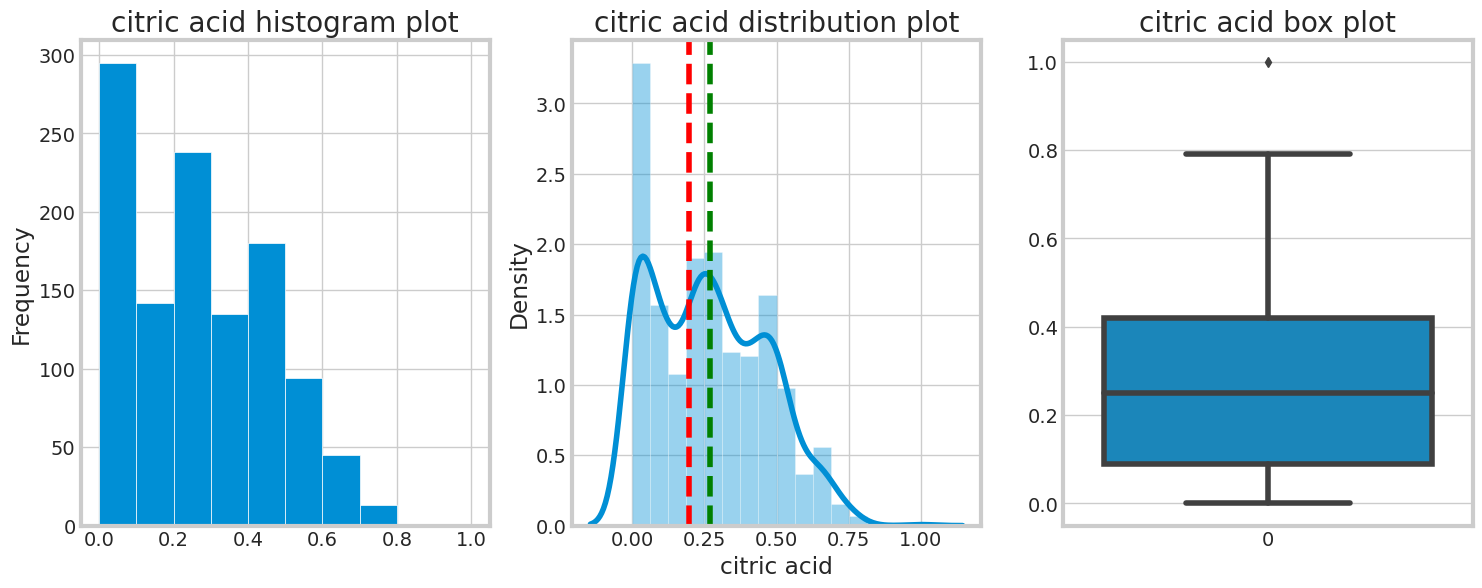

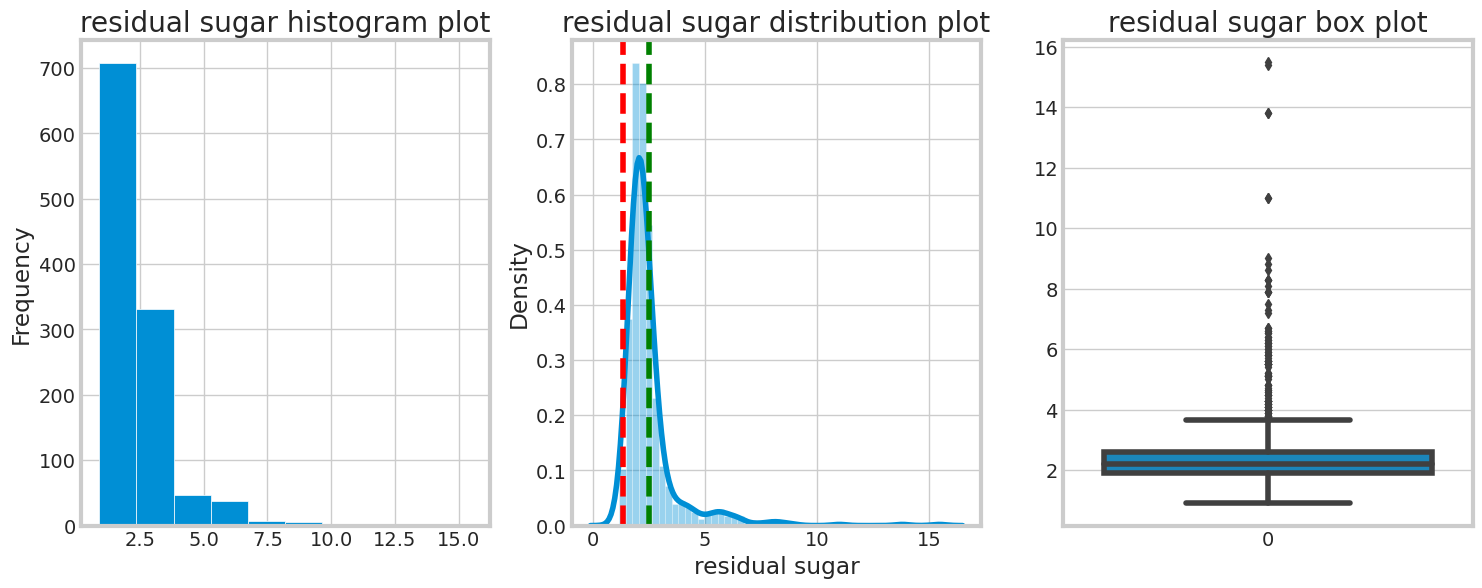

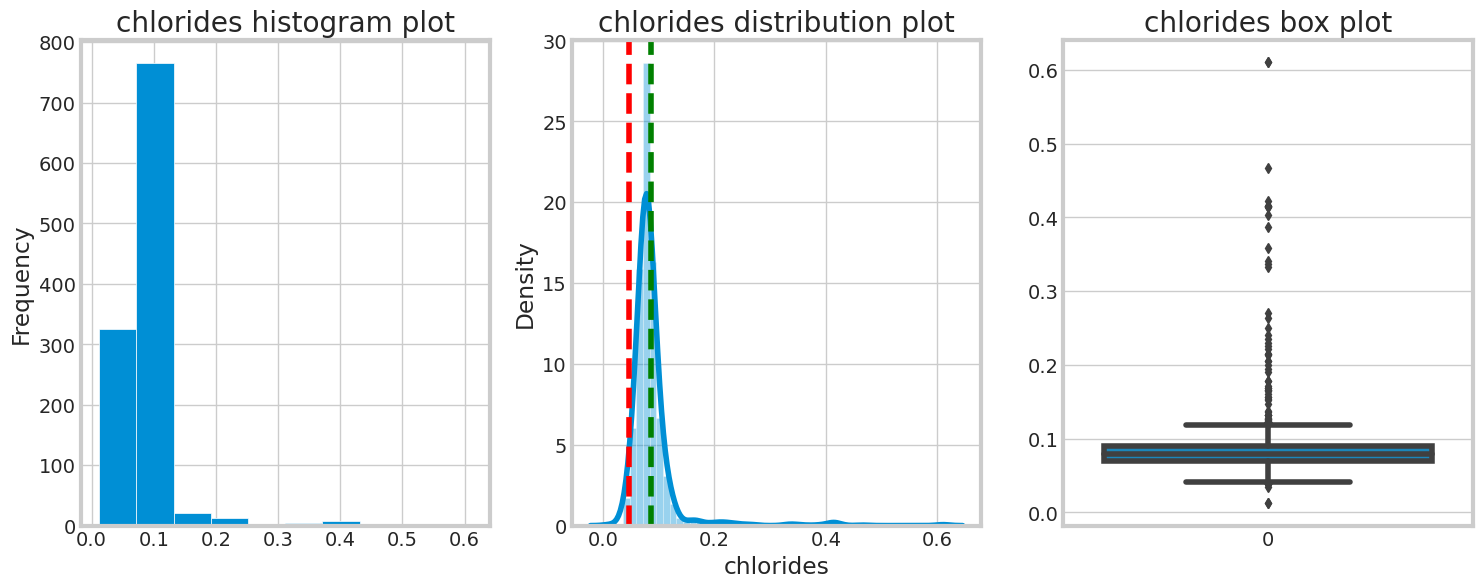

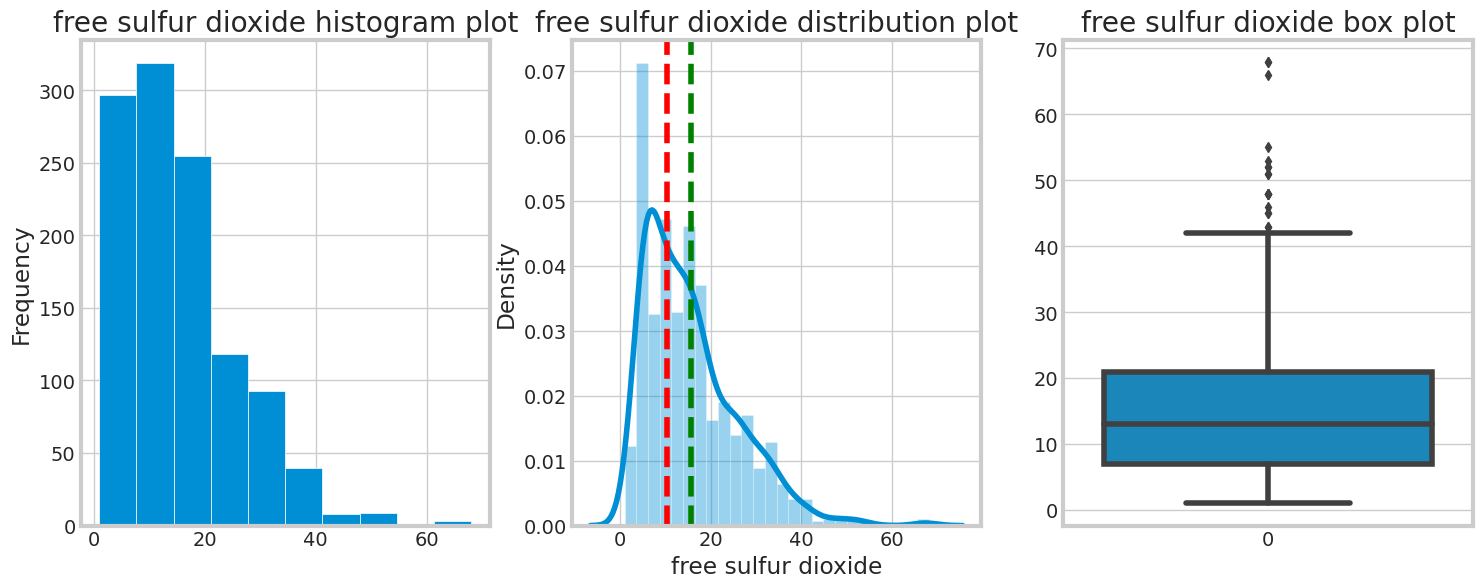

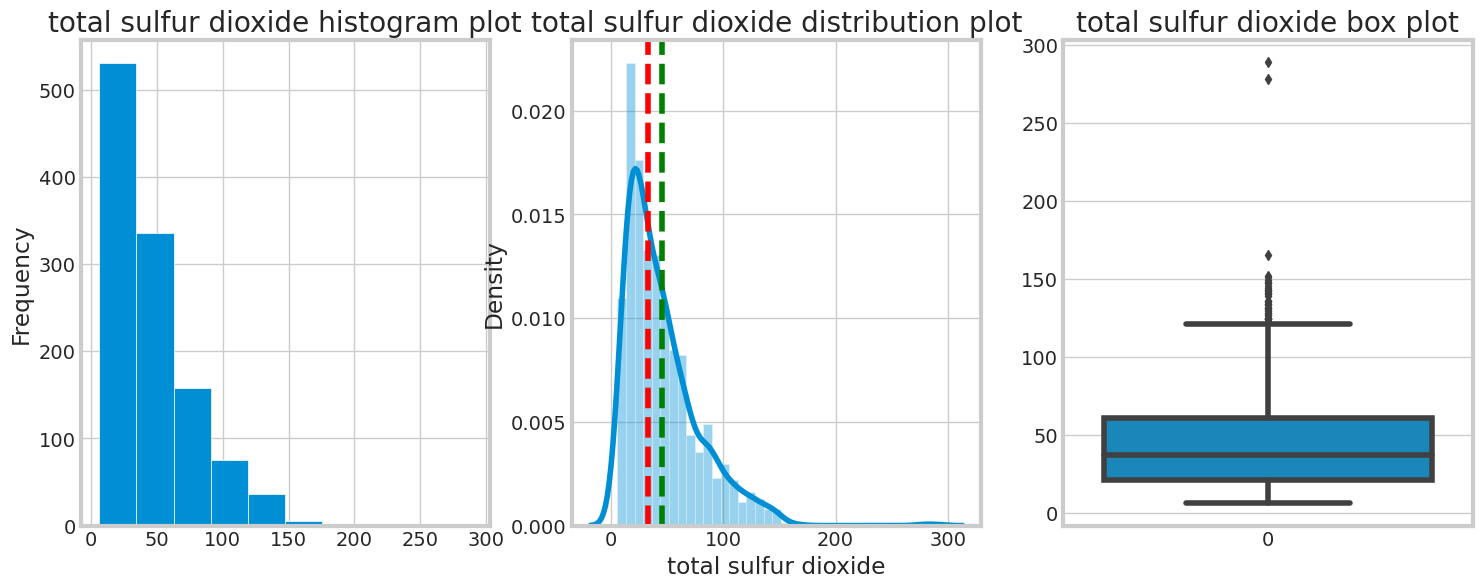

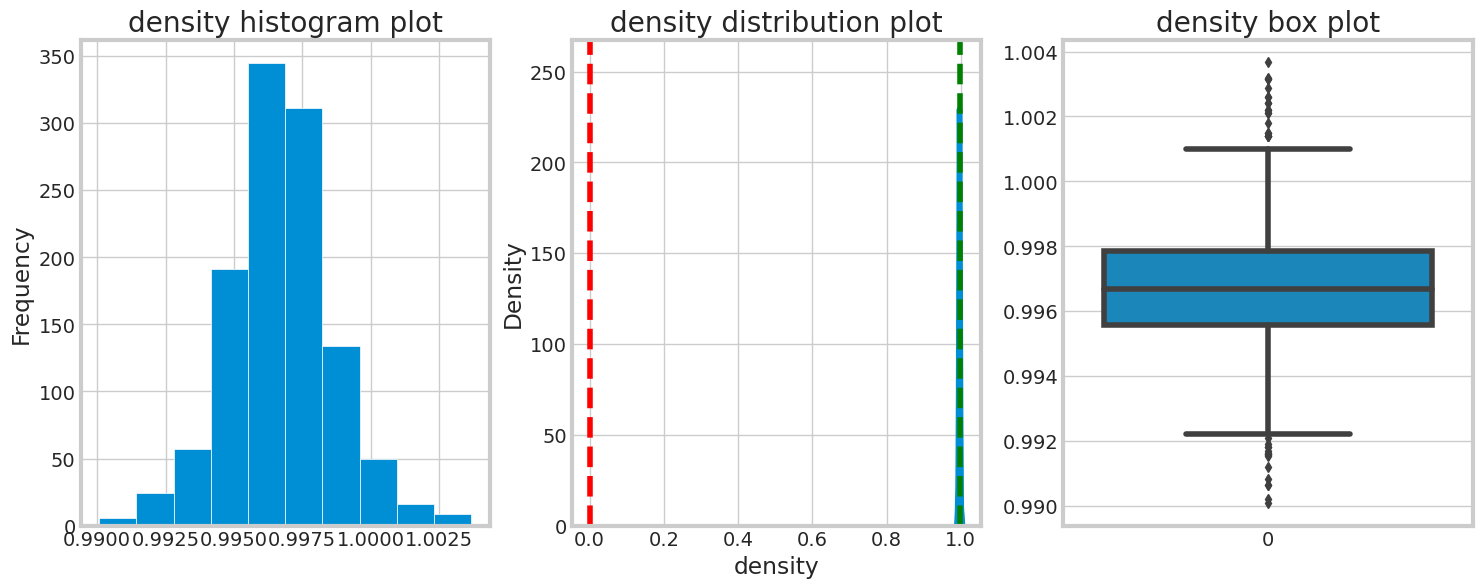

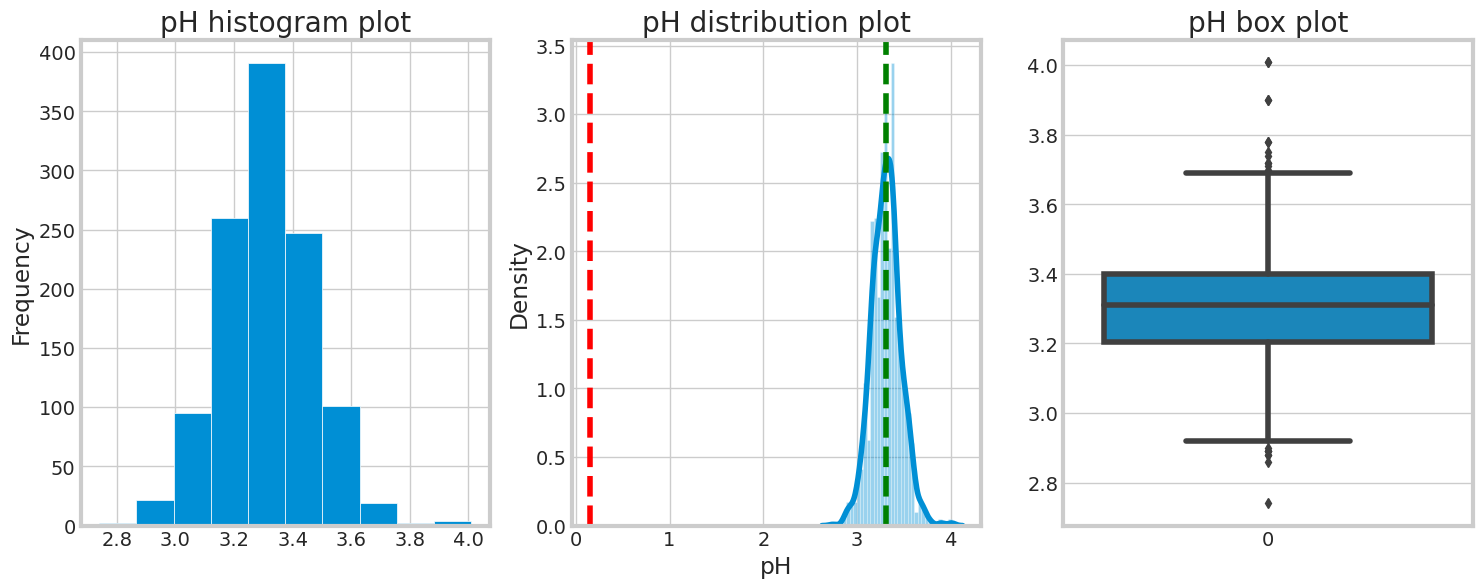

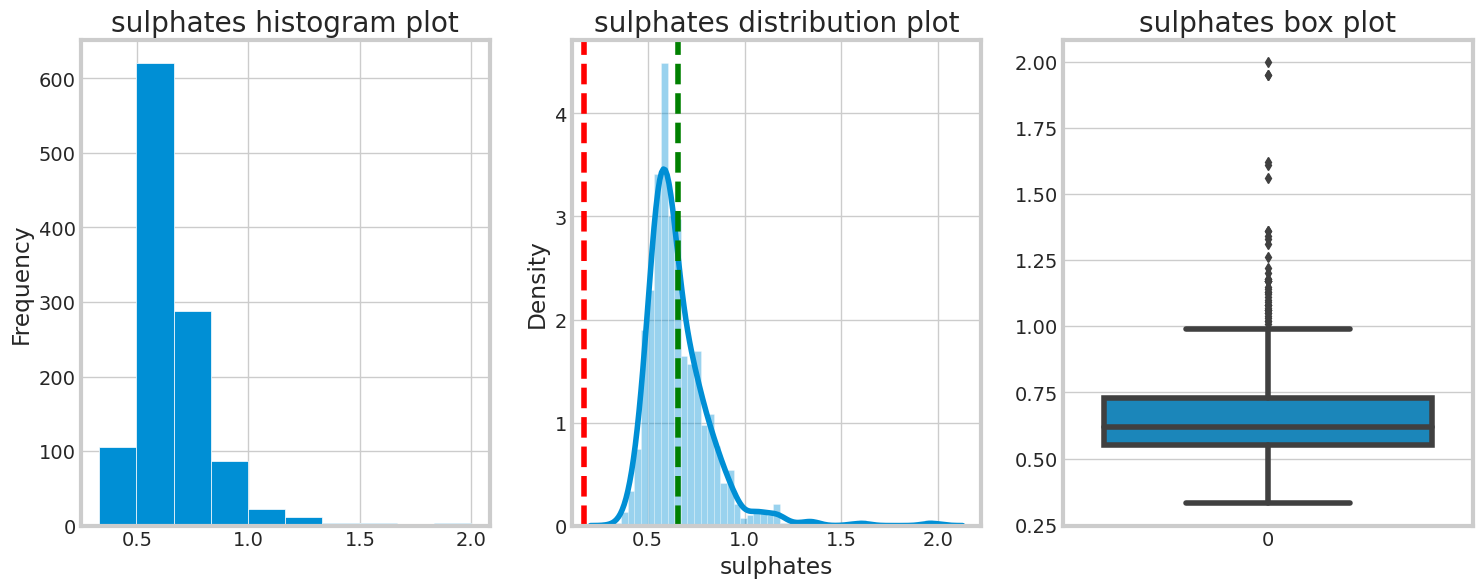

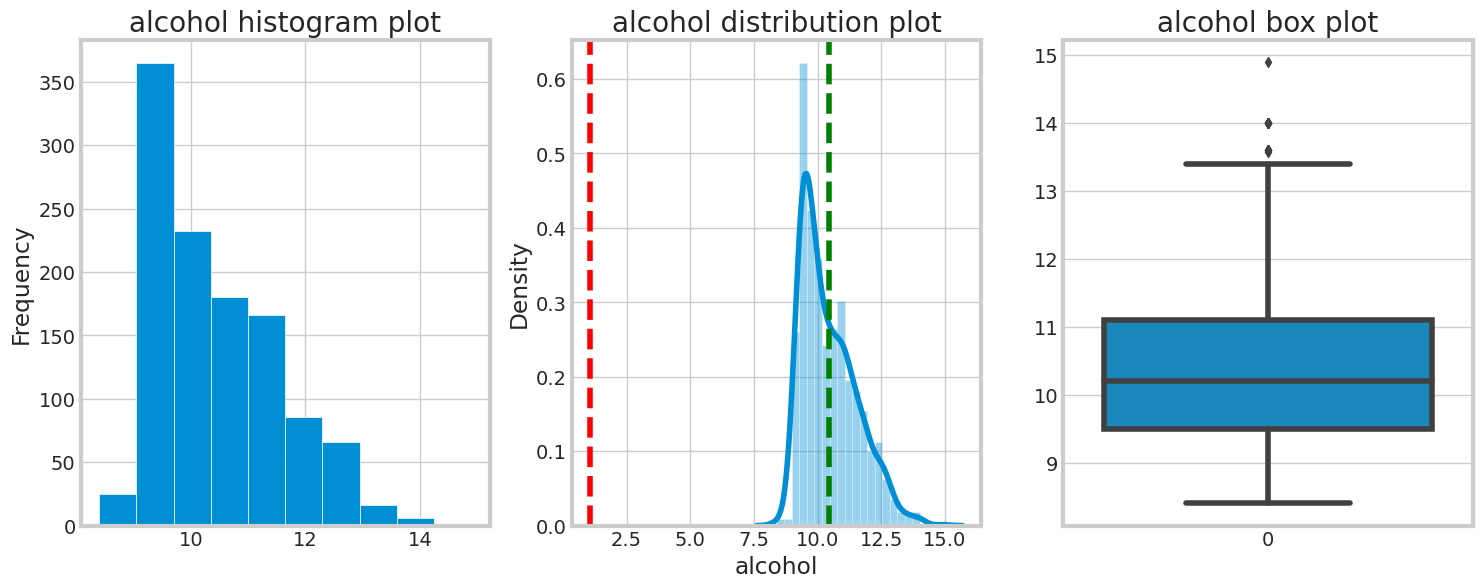

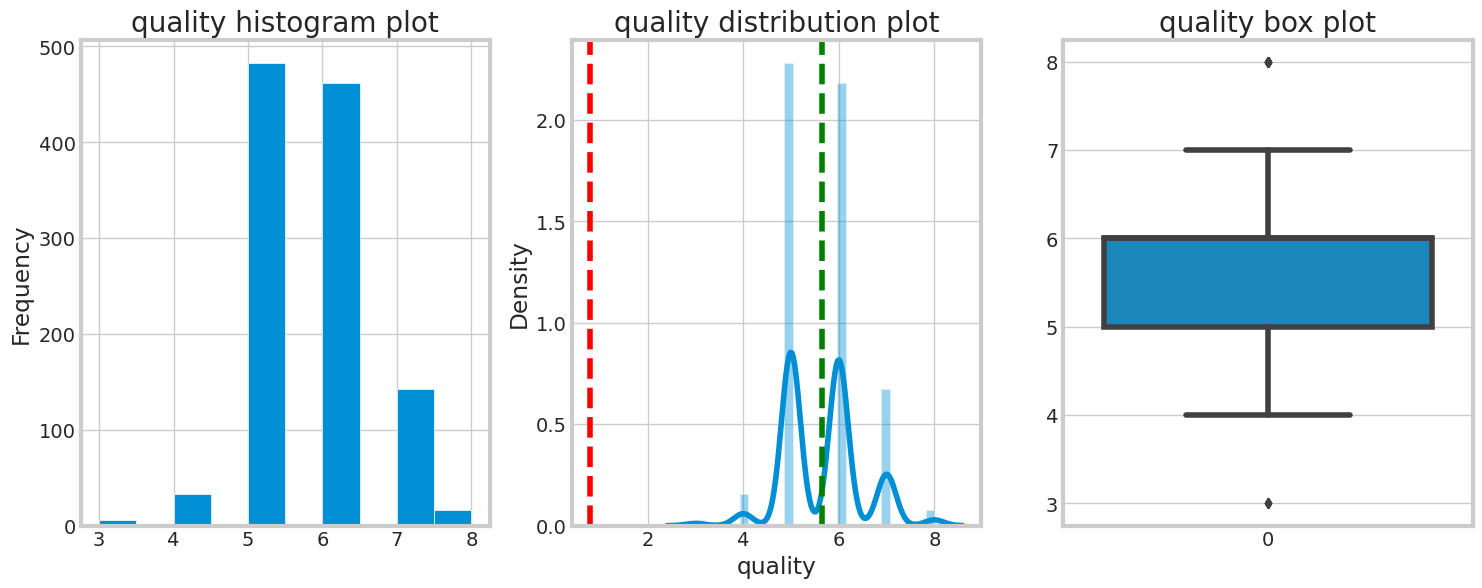

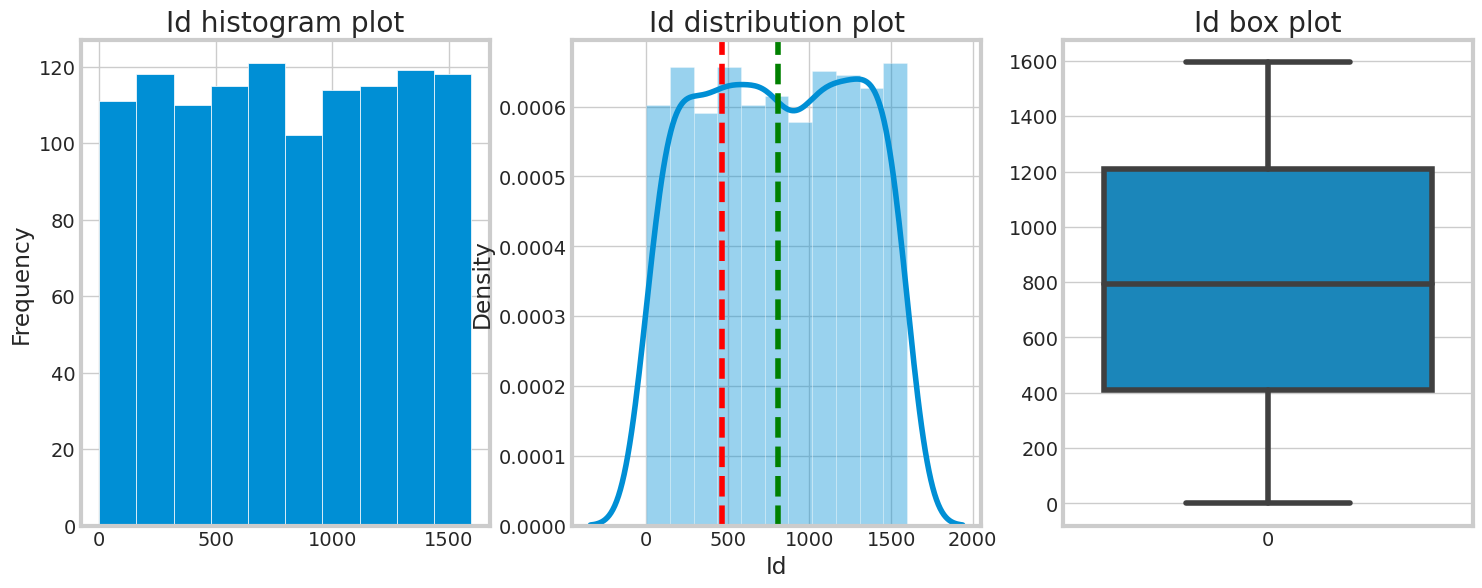

In [42]:
for i in num_feat.columns:
    feat_plot(num_feat[i])

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

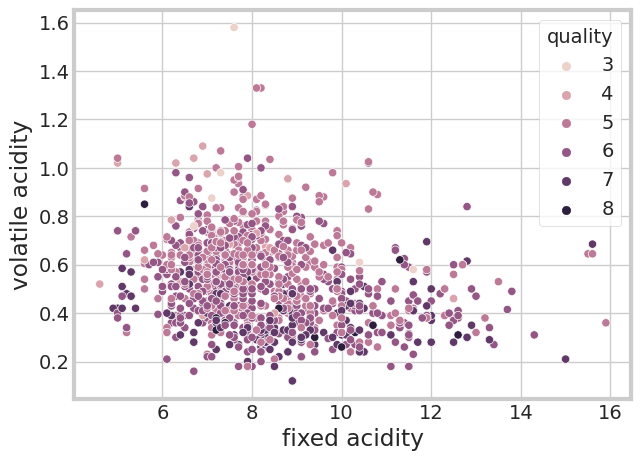

In [43]:
sns.scatterplot(data = df, x = df['fixed acidity'], y = 'volatile acidity', hue='quality')

<Axes: xlabel='citric acid', ylabel='residual sugar'>

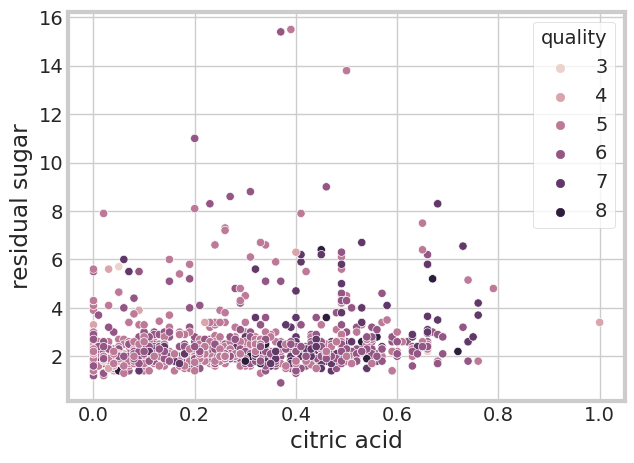

In [44]:
sns.scatterplot(data = df, x = 'citric acid', y= df['residual sugar'], hue = 'quality')

<Axes: xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

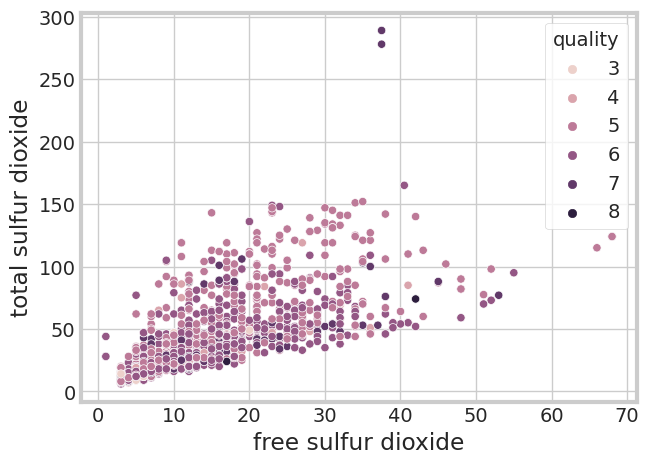

In [45]:
sns.scatterplot(x = df['free sulfur dioxide'], y=df['total sulfur dioxide'], hue = df['quality'])

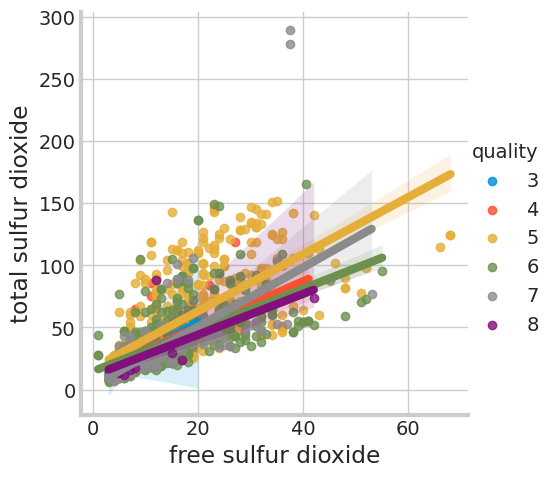

In [46]:
sns.lmplot(data=df, x = 'free sulfur dioxide', y='total sulfur dioxide', hue = 'quality')

<Axes: xlabel='pH', ylabel='sulphates'>

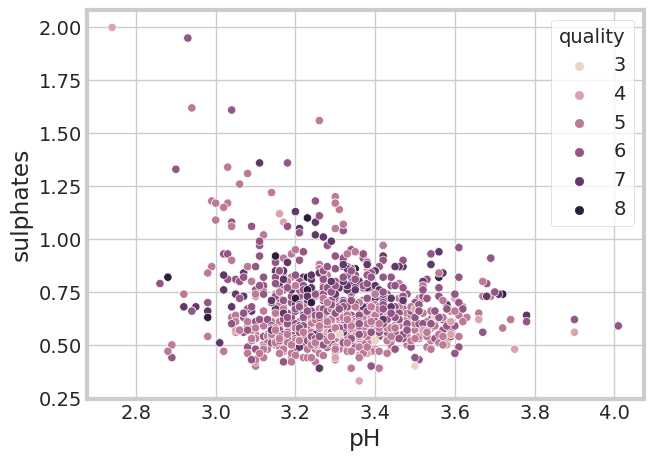

In [47]:
sns.scatterplot(x = df['pH'], y = df['sulphates'], hue = df['quality'])

<Axes: >

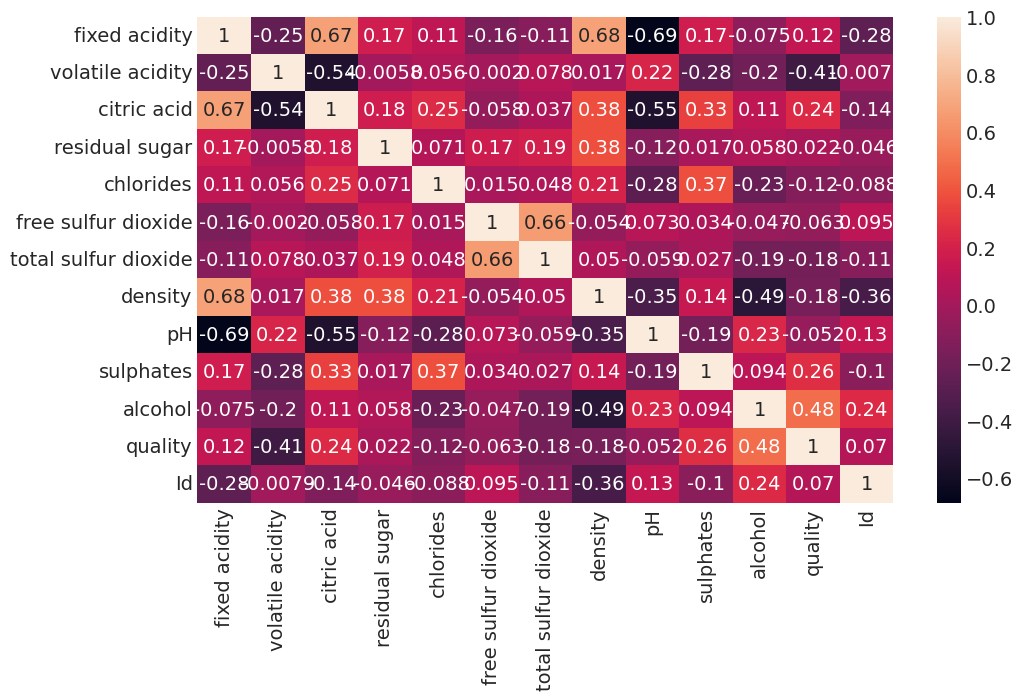

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [49]:
df.drop('Id', axis = 1, inplace=True)

In [50]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import catboost

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [53]:
print(f'Shape of the X_train: {X_train.shape}')
print(f'Shape of the X_test: {X_test.shape}')
print(f'Shape of the y_train: {y_train.shape}')
print(f'Shape of the y_test: {y_test.shape}')

Shape of the X_train: (914, 11)
Shape of the X_test: (229, 11)
Shape of the y_train: (914,)
Shape of the y_test: (229,)


In [54]:
def model_evaluation(model, X_train, y_train, X_test, y_test):
    
    print('Starting ...')
    
    ss = StandardScaler()
    X_train_ss = ss.fit_transform(X_train)
    X_test_ss = ss.fit_transform(X_test)
    print("Scaling process is done ...")
    
    print("**********************************")
    
    print("Model building process is started ...")
    mod = model.fit(X_train, y_train)
    mod_pred = model.predict(X_test)
    print("Model creation process is done ...")
    
    print("**********************************")
    print("Evaluation of the Model")
    print("***********************************")
    
    print("Classification report of the Model: \n {}".format(classification_report(y_test, mod_pred)))
    print("Confusion Matrix of the given Model: \n {}".format(confusion_matrix(y_test, mod_pred)))
    print("Accuracy score of the Model: \n{}".format(accuracy_score(y_test, mod_pred)))
    
    print("Evaluation process is done ...")
    print("***********************************************")
    
    return mod

In [55]:
rfc = RandomForestClassifier()
model_evaluation(rfc, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.76      0.79      0.78       102
           6       0.68      0.74      0.71        91
           7       0.65      0.56      0.60        27
           8       1.00      0.50      0.67         2

    accuracy                           0.72       229
   macro avg       0.52      0.43      0.46       229
weighted avg       0.69      0.72      0.70       229

Confusion Matrix of the given Model: 
 [[ 0  0  1  0  0  0]
 [ 0  0  5  1  0  0]
 [ 0  0 81 21  0  0]
 [ 0  0 17 67  7  0]
 [ 0  0  2 10 15  0]
 [ 0  0  0  0  1  1]]
Accuracy 

RandomForestClassifier()

In [56]:
dtc = DecisionTreeClassifier()
model_evaluation(dtc, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.17      0.22         6
           5       0.69      0.73      0.70       102
           6       0.57      0.55      0.56        91
           7       0.54      0.48      0.51        27
           8       0.17      0.50      0.25         2

    accuracy                           0.61       229
   macro avg       0.38      0.40      0.37       229
weighted avg       0.61      0.61      0.60       229

Confusion Matrix of the given Model: 
 [[ 0  0  1  0  0  0]
 [ 0  1  3  2  0  0]
 [ 0  1 74 26  1  0]
 [ 0  1 27 50  9  4]
 [ 0  0  3 10 13  1]
 [ 0  0  0  0  1  1]]
Accuracy 

DecisionTreeClassifier()

In [57]:
svc = SVC()
model_evaluation(svc, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.64      0.42      0.51       102
           6       0.45      0.80      0.58        91
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         2

    accuracy                           0.51       229
   macro avg       0.18      0.20      0.18       229
weighted avg       0.46      0.51      0.46       229

Confusion Matrix of the given Model: 
 [[ 0  0  0  1  0  0]
 [ 0  0  2  4  0  0]
 [ 0  0 43 59  0  0]
 [ 0  0 18 73  0  0]
 [ 0  0  4 23  0  0]
 [ 0  0  0  2  0  0]]
Accuracy 

SVC()

In [59]:
cat = catboost.CatBoostClassifier()
model_evaluation(cat, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Learning rate set to 0.078765
0:	learn: 1.6959588	total: 59.3ms	remaining: 59.2s
1:	learn: 1.6152352	total: 63.3ms	remaining: 31.6s
2:	learn: 1.5420301	total: 66.5ms	remaining: 22.1s
3:	learn: 1.4790990	total: 69.7ms	remaining: 17.3s
4:	learn: 1.4272293	total: 73ms	remaining: 14.5s
5:	learn: 1.3801140	total: 76.1ms	remaining: 12.6s
6:	learn: 1.3378452	total: 79.6ms	remaining: 11.3s
7:	learn: 1.3007202	total: 82.4ms	remaining: 10.2s
8:	learn: 1.2666360	total: 85.6ms	remaining: 9.43s
9:	learn: 1.2357985	total: 89.1ms	remaining: 8.82s
10:	learn: 1.2053916	total: 92.4ms	remaining: 8.3s
11:	learn: 1.1786206	total: 95.5ms	remaining: 7.86s
12:	learn: 1.1573092	total: 98.9ms	remaining: 7.51s
13:	learn: 1.1335753	total: 103ms	remaining: 7.23s
14:	learn: 1.1114943	total: 106ms	remaining: 6.96s
15:	learn: 1.0926481	total: 110ms	remaining: 6.74s
16:	learn: 1.0763406	total: 113ms	remain